# Inspect Processed Subdirectories

#### Updated: Dec 15, 2022

#  

Create methods to systematically inspect processed subdirectories, for quality and subsequent error analysis.

In [1]:
import pandas as pd
import numpy as np
import os
import random
from random import randrange
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

In [2]:
logDir = '//scientific/L-MP-Data/Massive files/Python/rnaidoo/Alouette_I/'
imageDir = 'U:/Data_Science/Projects_data/Alouette_I/04_processed/'
resultDir = 'U:/Data_Science/Projects_data/Alouette_I/05_result/'

#  

#### Functions:

In [3]:
def inspect_ionograms(roll, subdirectory, sample_list, imageDir, resultDir):
    
    mapped_coords_list = os.listdir(resultDir + 'mapped_coords/' + roll + '/' + subdirectory + '/')
    df_result = pd.read_csv(resultDir + roll + '/result-' + roll + '_' + subdirectory + '.csv')
    
    for image_fn in sample_list:
        print(image_fn)
        image_fn_ = image_fn.replace('.png', '')

        f, axs = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1,1.2],}, figsize=(20,5))

        for mapped_coord_fn in mapped_coords_list:
            if '_' + image_fn_ + '.npy' in mapped_coord_fn:
                print(mapped_coord_fn)
                arr_load = np.load(resultDir + 'mapped_coords/' + roll + '/' + subdirectory + '/' + mapped_coord_fn)
                print(arr_load.shape)

                df_plot = pd.DataFrame({
                'f': arr_load[:, 0],
                'depth': arr_load[:, 1]
                })
                df_plot['depth_plot'] = -1*df_plot['depth']

                axs[0].scatter(df_plot['f'], df_plot['depth_plot'], 1, color='black')
                axs[0].set(xlabel='frequency (MHz)', ylabel='depth (km)')

        img = mpimg.imread(imageDir + roll + '/' + subdirectory + '/' + image_fn)
        axs[1].imshow(img)
        axs[1].set(xticks=[], yticks=[])
        
        #Results
        df_result_img = df_result.loc[df_result['filename'] == image_fn]
        
        plt.show()
        print(df_result_img['processed_image_class'].iloc[0])
        print(df_result_img['Station Name'].iloc[0])
        if df_result_img['processed_image_class'].iloc[0] == 'loss':
            print(df_result_img['func_name'].iloc[0])
        elif df_result_img['processed_image_class'].iloc[0] == 'outlier':
            print(df_result_img['func_name'].iloc[0])
        print('')
        print('')

#  

#### Plot mapped coords for sample of images in random subdirectory:

In [4]:
sample_size = 10

df_process_log = pd.read_csv(logDir + 'process_log.csv')
print(len(df_process_log))
subdir_ids_list = df_process_log['subdir_id'].unique()
df_process_log.head()

2


Roll Subdirectory  Images_processed  Images_dot  Images_num  \
0  R014207978F          319               239         206           5   
1   R014207966      1185-1B               386           0         383   

   Images_loss  Images_outlier  Process_time           Process_timestamp User  \
0           11              17    259.625649  2022-12-15 23:28:15.951151  Rav   
1            0               3   1415.449691  2022-12-15 23:51:57.608703  Rav   

            subdir_id  
0     R014207978F_319  
1  R014207966_1185-1B

Select random subdirectory:

In [5]:
subdir_id = subdir_ids_list[randrange(len(subdir_ids_list))]
parts = subdir_id.split('_')
roll = parts[0]
subdirectory = parts[1]
print(roll)
print(subdirectory)

R014207966
1185-1B


Draw random sample of images from subdirectory, and inspect:

In [6]:
images_list = os.listdir(imageDir + roll + '/' + subdirectory + '/')
sample_list = random.sample(images_list, sample_size)
sample_list

['342.png',
 '296.png',
 '336.png',
 '288.png',
 '118.png',
 '282.png',
 '310.png',
 '247.png',
 '120.png',
 '164.png']

342.png
mapped_coords-R014207966_1185-1B_342.npy
(79866, 2)


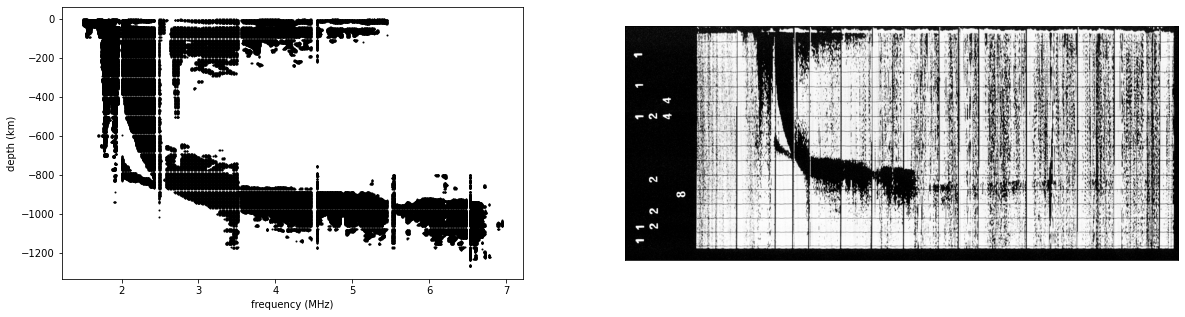

num
Resolute Bay, No.W.Territories


296.png
mapped_coords-R014207966_1185-1B_296.npy
(61152, 2)


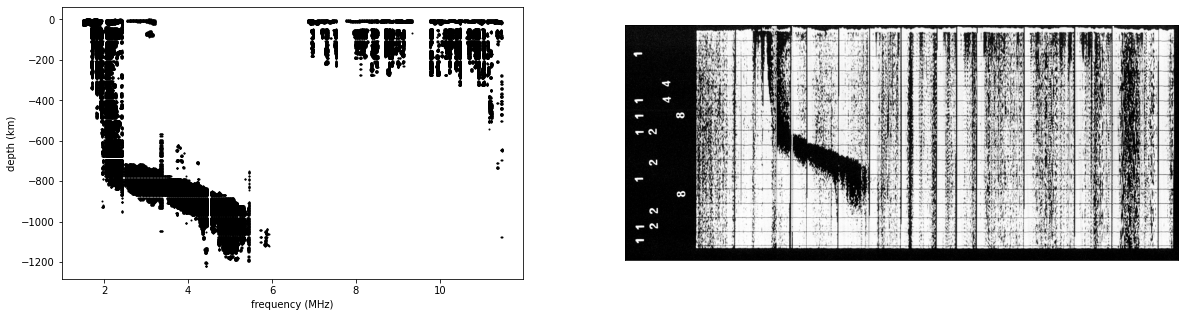

num
Resolute Bay, No.W.Territories


336.png
mapped_coords-R014207966_1185-1B_336.npy
(65049, 2)


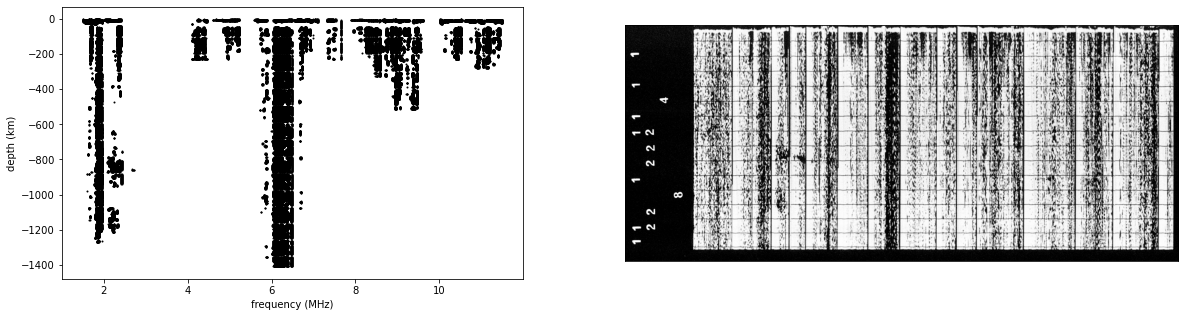

num
Resolute Bay, No.W.Territories


288.png
mapped_coords-R014207966_1185-1B_288.npy
(68434, 2)


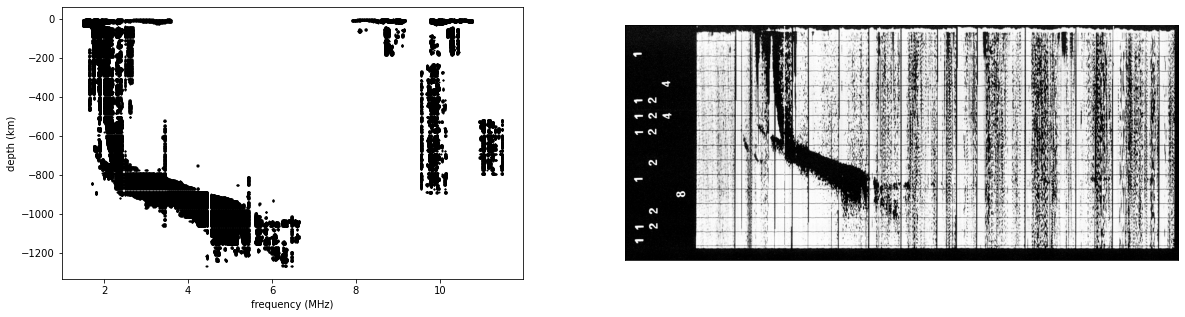

num
Resolute Bay, No.W.Territories


118.png
mapped_coords-R014207966_1185-1B_118.npy
(65529, 2)


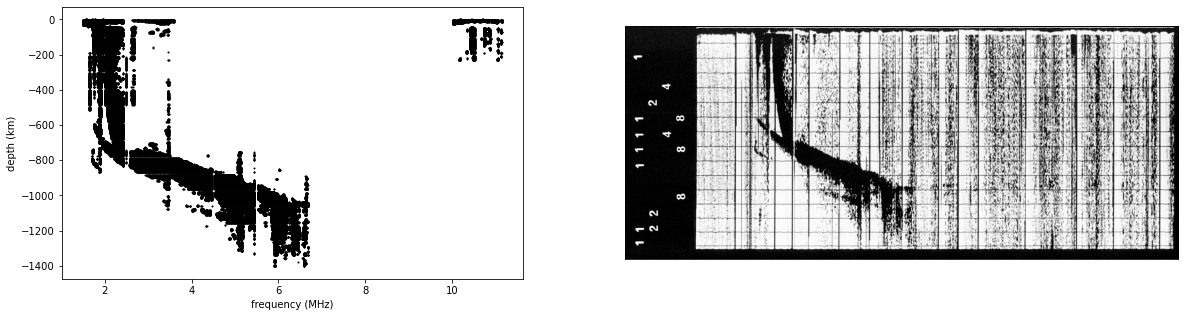

num
Resolute Bay, No.W.Territories


282.png
mapped_coords-R014207966_1185-1B_282.npy
(75210, 2)


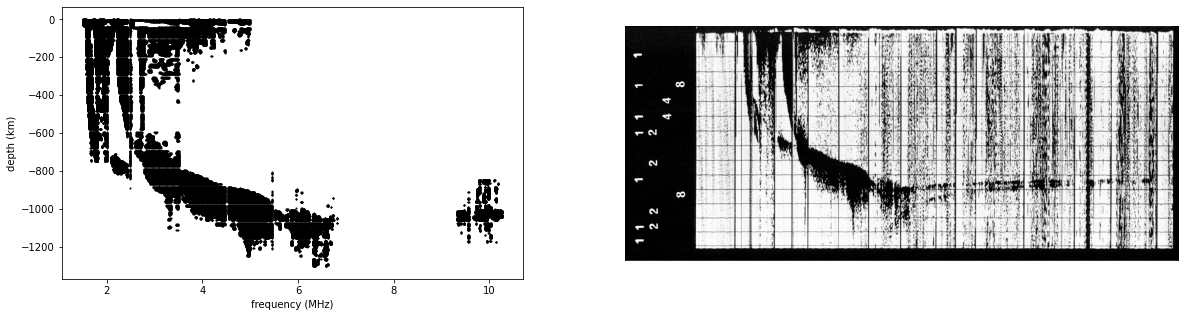

num
Resolute Bay, No.W.Territories


310.png
mapped_coords-R014207966_1185-1B_310.npy
(64256, 2)


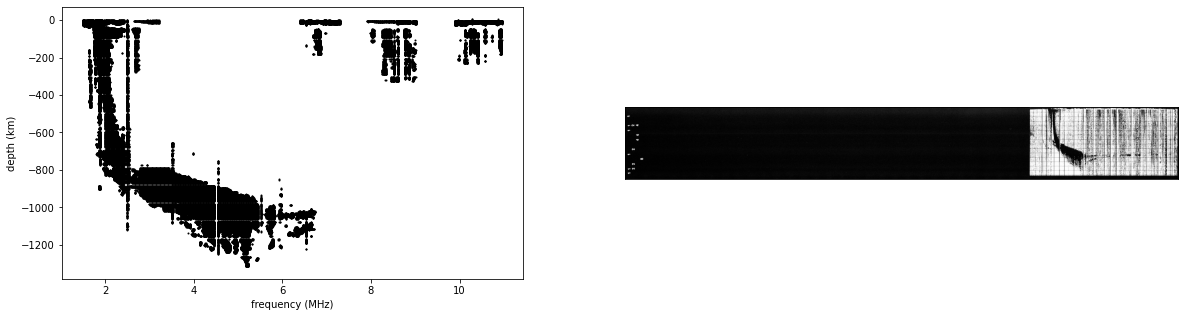

num
Resolute Bay, No.W.Territories


247.png
mapped_coords-R014207966_1185-1B_247.npy
(69720, 2)


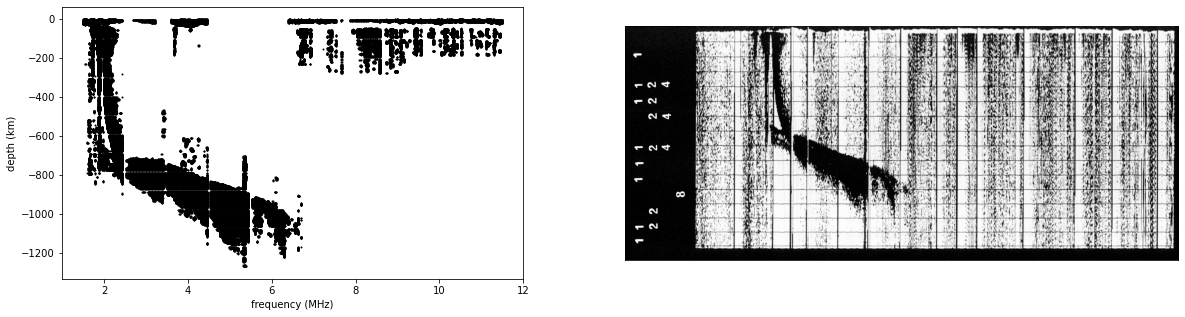

num
Resolute Bay, No.W.Territories


120.png
mapped_coords-R014207966_1185-1B_120.npy
(80174, 2)


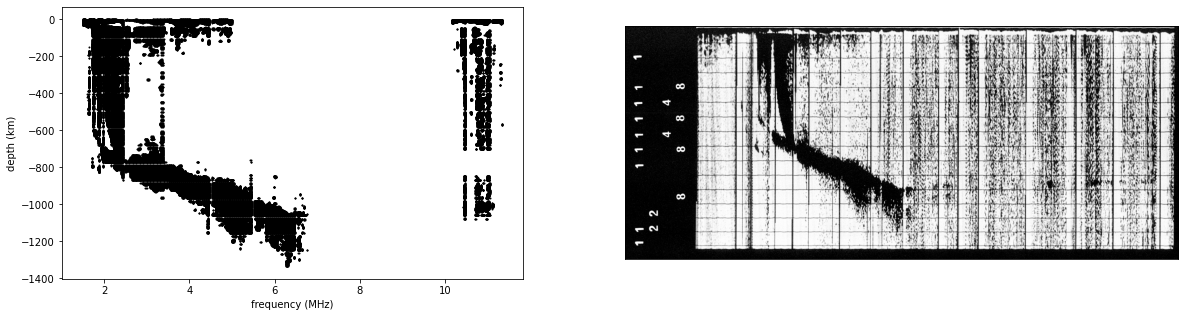

num
Resolute Bay, No.W.Territories


164.png
mapped_coords-R014207966_1185-1B_164.npy
(93191, 2)


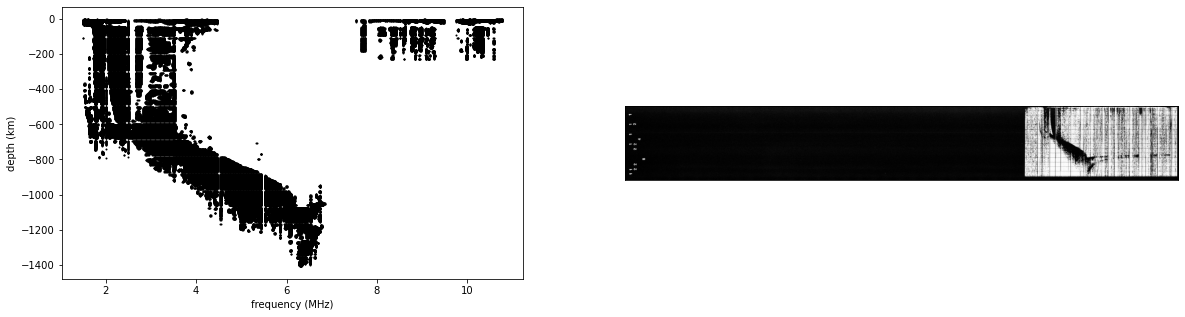

num
Resolute Bay, No.W.Territories




In [7]:
inspect_ionograms(roll=roll, subdirectory=subdirectory, sample_list=sample_list, imageDir=imageDir, resultDir=resultDir)

#  

#### Inpsect high-loss subdirectories:

In [8]:
df1 = df_process_log.sort_values('Images_loss', ascending=False).reset_index(drop=True)
df1.head(20)

Roll Subdirectory  Images_processed  Images_dot  Images_num  \
0  R014207978F          319               239         206           5   
1   R014207966      1185-1B               386           0         383   

   Images_loss  Images_outlier  Process_time           Process_timestamp User  \
0           11              17    259.625649  2022-12-15 23:28:15.951151  Rav   
1            0               3   1415.449691  2022-12-15 23:51:57.608703  Rav   

            subdir_id  
0     R014207978F_319  
1  R014207966_1185-1B

R014207978F
319

Image0310.png
mapped_coords-R014207978F_319_Image0310.npy
(52293, 2)


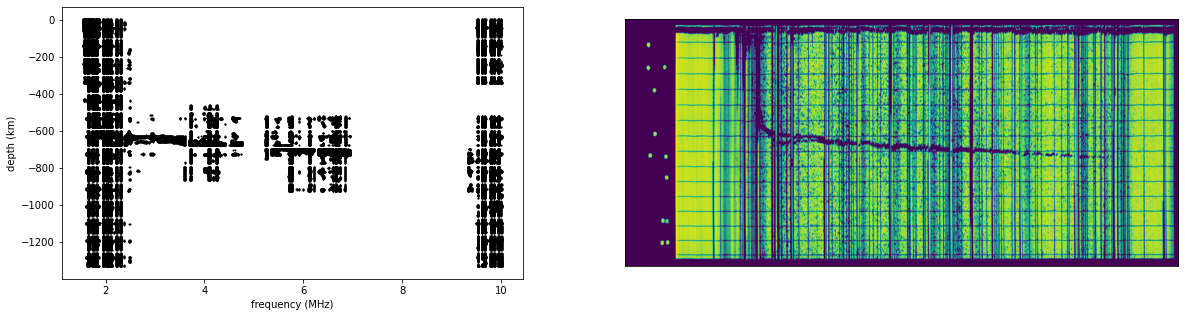

dot
Resolute Bay, No.W.Territories


Image0267.png
mapped_coords-R014207978F_319_Image0267.npy
(31137, 2)


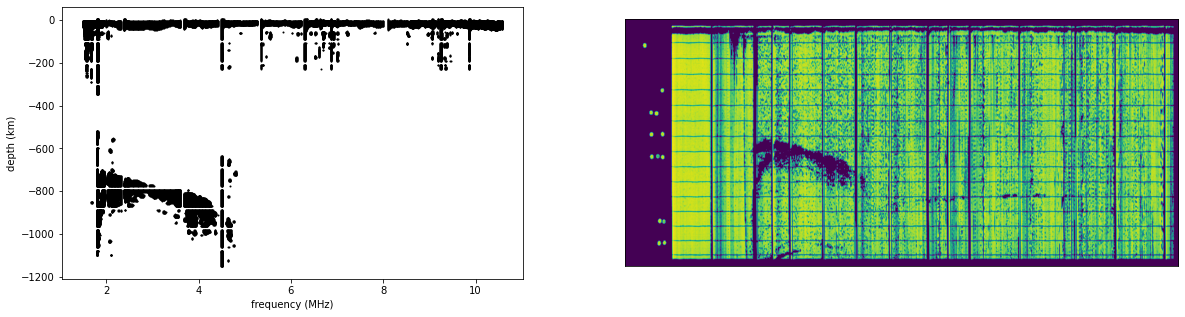

dot
Resolute Bay, No.W.Territories


Image0265.png
mapped_coords-R014207978F_319_Image0265.npy
(40060, 2)


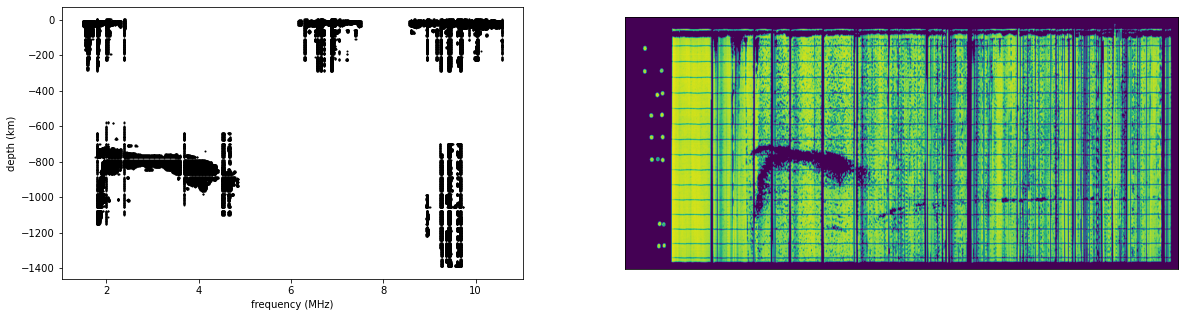

dot
Resolute Bay, No.W.Territories


Image0402.png


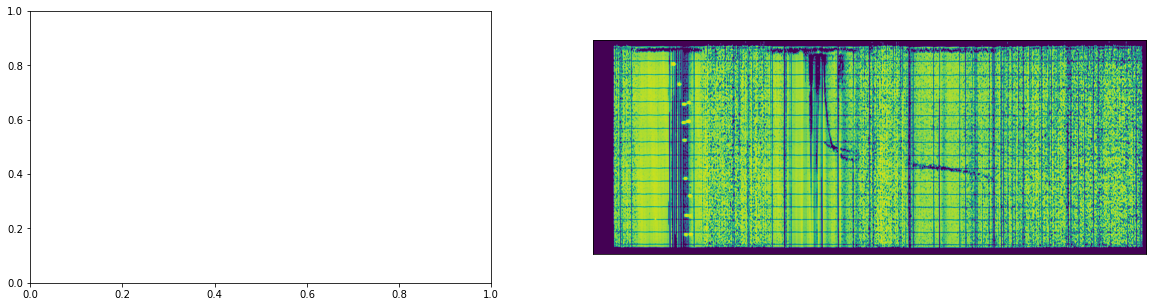

outlier
nan
image_segmentation.segment_images_in_subdir.segment_images: iono size outlier


Image0324.png
mapped_coords-R014207978F_319_Image0324.npy
(31081, 2)


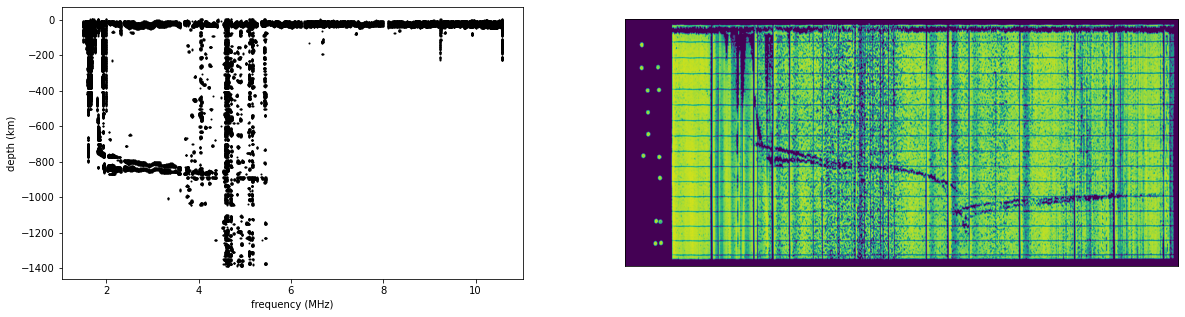

dot
Resolute Bay, No.W.Territories


Image0370.png
mapped_coords-R014207978F_319_Image0370.npy
(22348, 2)


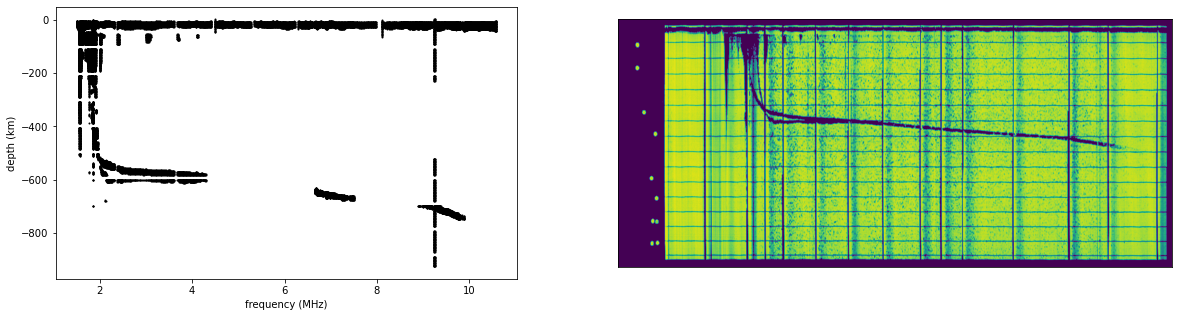

dot
Resolute Bay, No.W.Territories


Image0349.png
mapped_coords-R014207978F_319_Image0349.npy
(22224, 2)


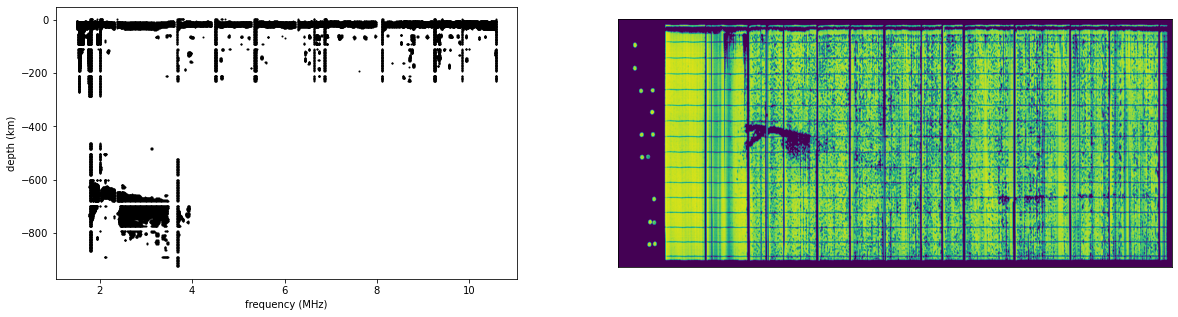

dot
Resolute Bay, No.W.Territories


Image0234.png
mapped_coords-R014207978F_319_Image0234.npy
(29344, 2)


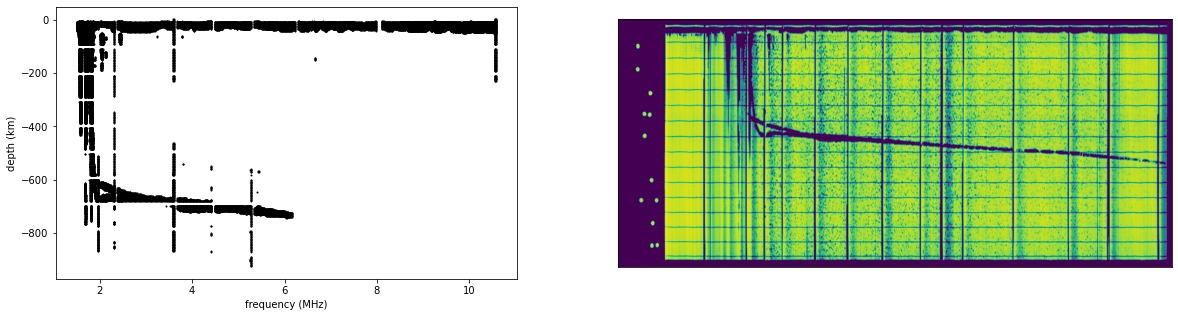

dot
Resolute Bay, No.W.Territories


Image0395.png
mapped_coords-R014207978F_319_Image0395.npy
(24551, 2)


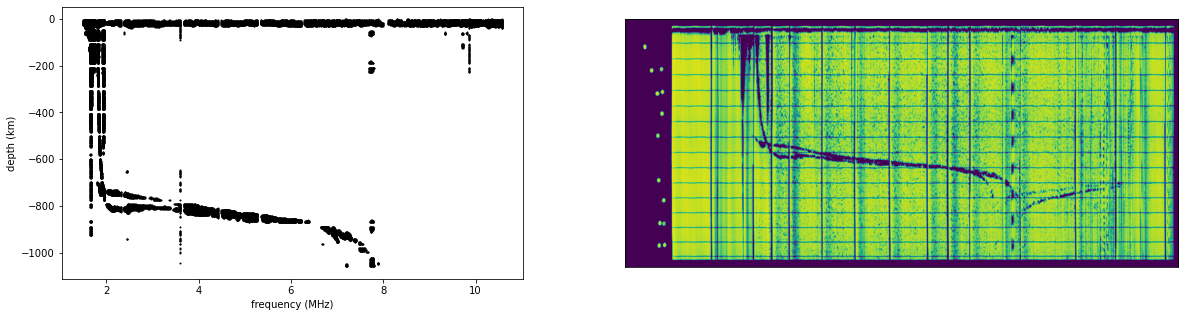

dot
Resolute Bay, No.W.Territories


Image0317.png
mapped_coords-R014207978F_319_Image0317.npy
(34714, 2)


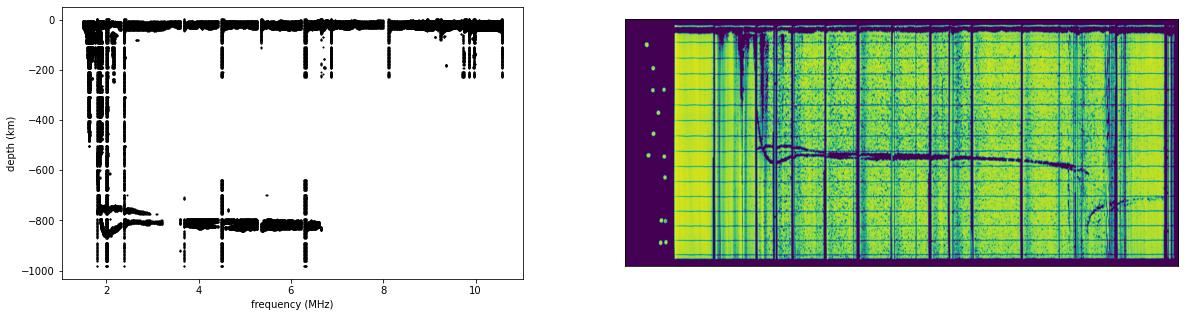

dot
Resolute Bay, No.W.Territories




In [9]:
i = 0 #DEMO 0, 14
sample_size = 10

roll = df1['Roll'].iloc[i]
subdirectory = df1['Subdirectory'].iloc[i]
print(roll)
print(subdirectory)
print('')
images_list = os.listdir(imageDir + roll + '/' + subdirectory + '/')
sample_list = random.sample(images_list, sample_size)
inspect_ionograms(roll=roll, subdirectory=subdirectory, sample_list=sample_list, imageDir=imageDir, resultDir=resultDir)